<a href="https://colab.research.google.com/github/Samay-jain622/Analysis-of-Employee-sentiment-on-company-stock-market-performance-/blob/main/statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

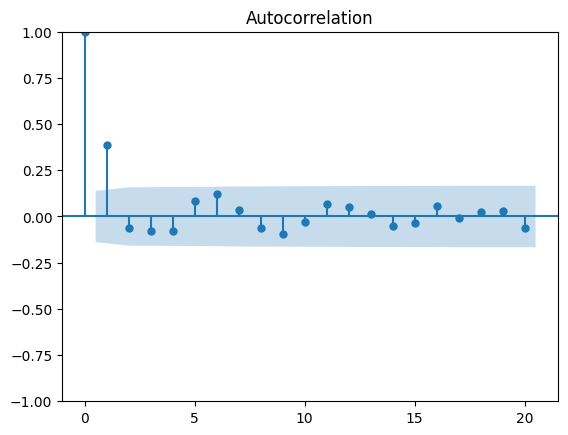

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generate an MA(1) time series
np.random.seed(42)
n = 200
theta = 0.6  # MA(1) coefficient
errors = np.random.normal(0, 1, n)
Y = np.zeros(n)

for t in range(1, n):
    Y[t] = errors[t] + theta * errors[t-1]

# Plot the ACF for the time series
plot_acf(Y, lags=20)
plt.show()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate sample data
np.random.seed(42)
n = 300
e = np.random.normal(0, 1, n)  # Error terms

# ARMA(2, 2) model: y_t = 0.6y_{t-1} - 0.3y_{t-2} + e_t + 0.5e_{t-1} - 0.4e_{t-2}
y = np.zeros(n)
for t in range(2, n):
    y[t] = 0.6 * y[t-1] - 0.3 * y[t-2] + e[t] + 0.5 * e[t-1] - 0.4 * e[t-2]

# Fit an ARMA model (p=2, q=2)
model = ARIMA(y, order=(2, 0, 2)).fit()

# Print model summary
print(model.summary())



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -420.361
Date:                Wed, 23 Oct 2024   AIC                            852.723
Time:                        11:01:13   BIC                            874.946
Sample:                             0   HQIC                           861.616
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0138      0.080     -0.174      0.862      -0.170       0.142
ar.L1          0.5941      0.165      3.596      0.000       0.270       0.918
ar.L2         -0.2823      0.066     -4.273      0.0

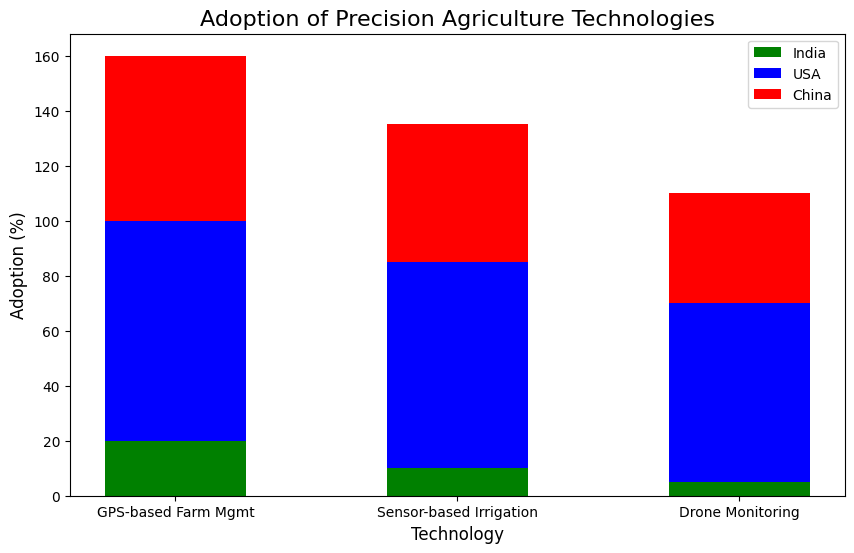

In [ ]:
# Data for precision agriculture adoption (in percentage)
adoption_tech = ['GPS-based Farm Mgmt', 'Sensor-based Irrigation', 'Drone Monitoring']
india_adoption = [20, 10, 5]  # Example percentages for India
usa_adoption = [80, 75, 65]   # Example percentages for USA
china_adoption = [60, 50, 40] # Example percentages for China

# Create stacked bar chart
bar_width = 0.5
index = np.arange(len(adoption_tech))

plt.figure(figsize=(10, 6))
plt.bar(index, india_adoption, bar_width, label='India', color='green')
plt.bar(index, usa_adoption, bar_width, bottom=india_adoption, label='USA', color='blue')
plt.bar(index, china_adoption, bar_width, bottom=np.array(india_adoption)+np.array(usa_adoption), label='China', color='red')

plt.title('Adoption of Precision Agriculture Technologies', fontsize=16)
plt.xlabel('Technology', fontsize=12)
plt.ylabel('Adoption (%)', fontsize=12)
plt.xticks(index, adoption_tech)
plt.legend()
plt.show()


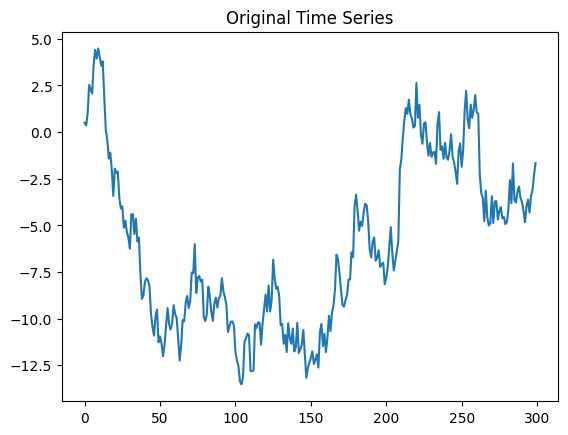

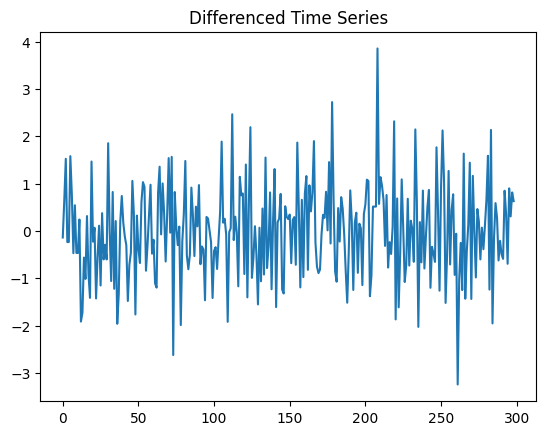

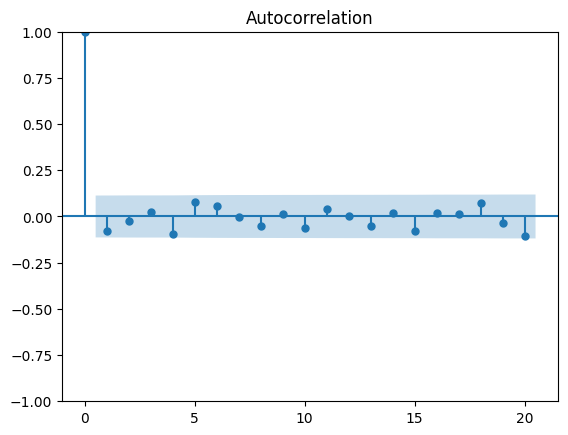

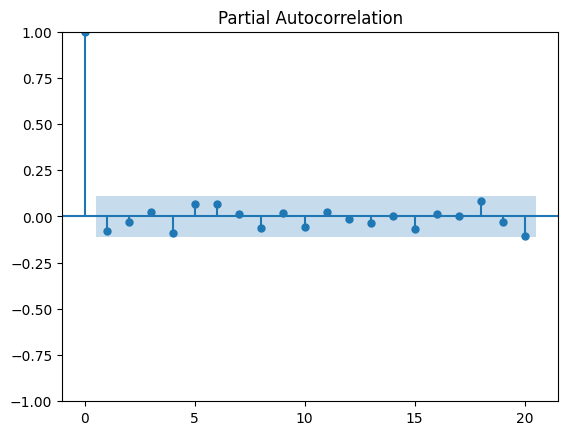

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -418.357
Date:                Wed, 23 Oct 2024   AIC                            842.714
Time:                        12:03:43   BIC                            853.815
Sample:                             0   HQIC                           847.157
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2477      0.689      0.360      0.719      -1.102       1.597
ma.L1         -0.3279      0.666     -0.492      0.623      -1.634       0.978
sigma2         0.9612      0.069     13.859      0.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate some example time series data (non-stationary)
np.random.seed(42)
n = 300
y = np.cumsum(np.random.normal(0, 1, n))  # Cumulative sum (random walk) to create a non-stationary series

# Plot the original series
plt.plot(y)
plt.title('Original Time Series')
plt.show()

# Check stationarity with differencing
y_diff = np.diff(y)  # First difference to make the series stationary

# Plot the differenced series
plt.plot(y_diff)
plt.title('Differenced Time Series')
plt.show()

# Plot ACF and PACF to determine p and q
plot_acf(y_diff, lags=20)
plt.show()

plot_pacf(y_diff, lags=20)
plt.show()

# Fit ARIMA model (assume p=1, d=1, q=1 based on ACF/PACF results)
model = ARIMA(y, order=(1, 1, 1)).fit()

# Print model summary
print(model.summary())

# Forecast the next 10 periods
forecast = model.forecast(steps=10)
print(forecast)


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Example dataset: GDP growth and Interest rate
data = {
    'GDP_growth': [2.1, 2.4, 2.3, 2.0, 1.9, 1.8, 2.5, 2.3, 2.6, 2.7, 2.1],
    'Interest_rate': [5.0, 5.1, 5.0, 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2]
}

# Convert the dataset to a DataFrame
df = pd.DataFrame(data)

# Perform the Granger causality test with a maximum lag of 2
granger_test = grangercausalitytests(df[['GDP_growth', 'Interest_rate']], maxlag=2, verbose=True)

# The output will display both t-statistics and F-statistics for each lag



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6028  , p=0.4629  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=0.8611  , p=0.3534  , df=1
likelihood ratio test: chi2=0.8260  , p=0.3634  , df=1
parameter F test:         F=0.6028  , p=0.4629  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8836  , p=0.4811  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=3.9761  , p=0.1370  , df=2
likelihood ratio test: chi2=3.2930  , p=0.1927  , df=2
parameter F test:         F=0.8836  , p=0.4811  , df_denom=4, df_num=2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR

# Example data for two time series (GDP and Inflation)
data = {
    'GDP': [2.1, 2.5, 2.3, 2.8, 3.0, 2.9, 2.7, 2.4, 2.2, 2.6],
    'Inflation': [1.5, 1.7, 1.6, 1.8, 1.9, 1.7, 1.6, 1.4, 1.3, 1.5]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Fit the VAR model
model = VAR(df)
results = model.fit(maxlags=2)  # Using lag 2 as an example

# Summary of the fitted model
print(results.summary())

# Forecast the next 5 periods
forecast = results.forecast(df.values[-2:], steps=5)
print(forecast)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 23, Oct, 2024
Time:                     14:27:41
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -8.64464
Nobs:                     8.00000    HQIC:                  -9.41370
Log likelihood:           22.2728    FPE:                0.000245731
AIC:                     -8.74395    Det(Omega_mle):     9.30580e-05
--------------------------------------------------------------------
Results for equation GDP
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                1.341876         1.665031            0.806           0.420
L1.GDP               0.004039         1.665347            0.002           0.998
L1.Inflation         0.538600         3.079553            0.175   

In [ ]:
forecast

array([[2.41862657, 1.42975763],
       [2.40268258, 1.38230226],
       [2.38049226, 1.40817398],
       [2.36699505, 1.37785462],
       [2.37411081, 1.41095076]])

<ipython-input-4-f3a7c5309b8d>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time = pd.date_range(start='2020-01-01', periods=36, freq='M')


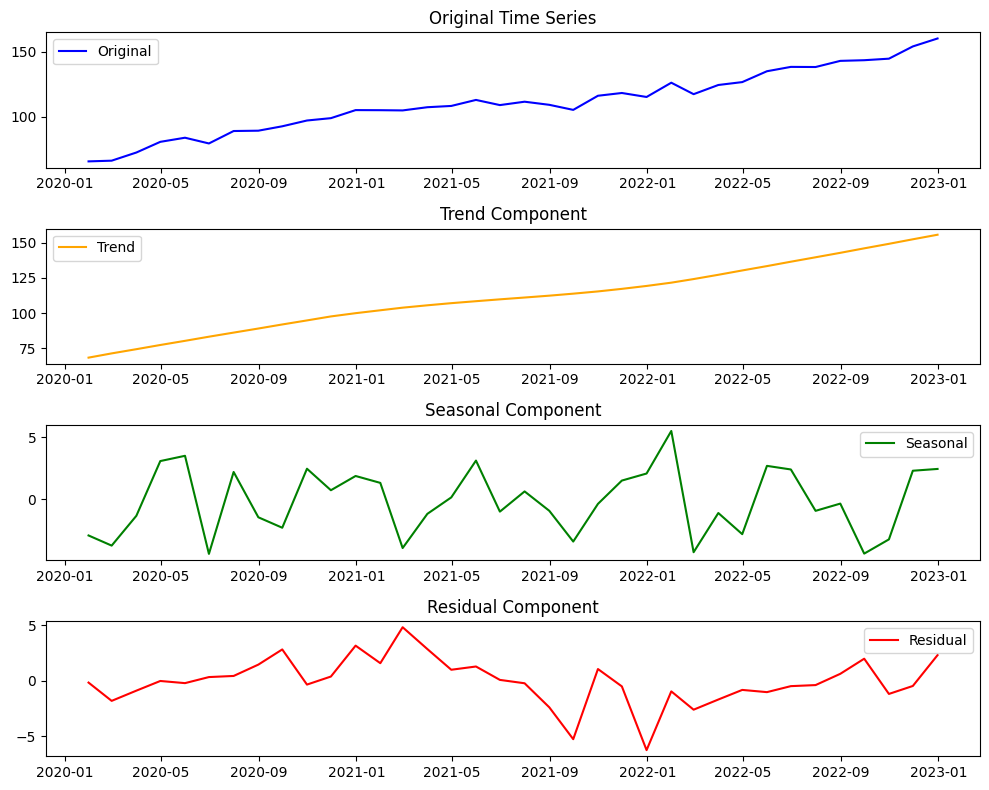

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Generate example time series data (monthly sales)
np.random.seed(0)
time = pd.date_range(start='2020-01-01', periods=36, freq='M')
seasonal = 10 + np.sin(np.linspace(0, 3.14 * 2, 36)) * 10  # Seasonal pattern
trend = np.linspace(50, 150, 36)  # Increasing trend
noise = np.random.normal(0, 3, 36)  # Random noise
sales = seasonal + trend + noise

# Create a DataFrame
df = pd.DataFrame({'Month': time, 'Sales': sales})
df.set_index('Month', inplace=True)

# Perform STL decomposition
stl = STL(df['Sales'], seasonal=13)  # 13 is the seasonal period for monthly data
result = stl.fit()

# Plot the results
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
axes[0].plot(df['Sales'], label='Original', color='blue')
axes[0].set_title('Original Time Series')
axes[0].legend()

axes[1].plot(result.trend, label='Trend', color='orange')
axes[1].set_title('Trend Component')
axes[1].legend()

axes[2].plot(result.seasonal, label='Seasonal', color='green')
axes[2].set_title('Seasonal Component')
axes[2].legend()

axes[3].plot(result.resid, label='Residual', color='red')
axes[3].set_title('Residual Component')
axes[3].legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

In [ ]:
ticker_industry = {
    "AAL": "Airlines",
    "AAPL": "Technology",
    "ABBNY": "Industrial Goods",
    "ABT": "Healthcare",
    "ACI": "Retail",
    "ACM": "Industrial Goods",
    "ACN": "Technology",
    "ADBE": "Technology",
    "ADMT": "Technology",
    "ADSK": "Technology",
    "AEO": "Retail",
    "ALIZY": "Healthcare",
    "ALL": "Financial Services",
    "AMAT": "Technology",
    "AMC": "Entertainment",
    "AMZN": "Retail",
    "ANGI": "Technology",
    "AON": "Financial Services",
    "AXAHY": "Financial Services",
    "AXP": "Financial Services",
    "AZN": "Healthcare",
    "AZO": "Retail",
    "BA": "Aerospace & Defense",
    "BAH": "Professional Services",
    "BAX": "Healthcare",
    "BAYRY": "Financial Services",
    "BBY": "Retail",
    "BCS": "Financial Services",
    "BKD": "Healthcare",
    "BLK": "Financial Services",
    "BML-PG": "Financial Services",
    "BMY": "Healthcare",
    "BSX": "Healthcare",
    "BTBD": "Technology",
    "BURL": "Retail",
    "CAH": "Healthcare",
    "CAT": "Industrial Goods",
    "CBRE": "Real Estate",
    "CBRL": "Restaurant",
    "CMCSA": "Communication Services",
    "CMG": "Restaurant",
    "CMI": "Industrial Goods",
    "CNC": "Healthcare",
    "CNDT": "Technology",
    "CNXC": "Technology",
    "COF": "Financial Services",
    "COST": "Retail",
    "CRM": "Technology",
    "CSCO": "Technology",
    "CTAS": "Services",
    "CTRN": "Retail",
    "CTSH": "Technology",
    "CVS": "Healthcare",
    "CVX": "Energy",
    "DAL": "Airlines",
    "DB": "Financial Services",
    "DELL": "Technology",
    "DG": "Retail",
    "DGX": "Healthcare",
    "DHY": "Financial Services",
    "DLTR": "Retail",
    "DOCU": "Technology",
    "DOX": "Technology",
    "DVA": "Healthcare",
    "DXC": "Technology",
    "EBAY": "Retail",
    "ECL": "Industrial Goods",
    "EFSC": "Financial Services",
    "ELV": "Healthcare",
    "EMR": "Industrial Goods",
    "EPAM": "Technology",
    "ETN": "Industrial Goods",
    "EXPE": "Technology",
    "FAST": "Industrial Goods",
    "FDS": "Financial Services",
    "FDX": "Transportation",
    "FI": "Financial Services",
    "FL": "Retail",
    "G": "Technology",
    "GEHC": "Healthcare",
    "GIB": "Technology",
    "GLOB": "Technology",
    "GME": "Retail",
    "GPS": "Retail",
    "GRAB": "Technology",
    "GS": "Financial Services",
    "GSK": "Healthcare",
    "H": "Hospitality",
    "HAL": "Energy",
    "HAR": "Industrial Goods",
    "HCA": "Healthcare",
    "HLT": "Hospitality",
    "HMC": "Automotive",
    "HON": "Industrial Goods",
    "HSBC": "Financial Services",
    "HTZ": "Transportation",
    "HUBS": "Technology",
    "HUM": "Healthcare",
    "IBN": "Financial Services",
    "ICLR": "Healthcare",
    "IFNNY": "Technology",
    "INFY": "Technology",
    "IQV": "Healthcare",
    "IT": "Technology",
    "J": "Financial Services",
    "JCI": "Industrial Goods",
    "JWN": "Retail",
    "KELYB": "Technology",
    "KMX": "Retail",
    "KR": "Retail",
    "LDOS": "Technology",
    "LEO": "Technology",
    "LHX": "Aerospace & Defense",
    "LMT": "Aerospace & Defense",
    "LTH": "Technology",
    "LULU": "Retail",
    "LUMN": "Telecommunications",
    "LUV": "Airlines",
    "LYG": "Financial Services",
    "MA": "Financial Services",
    "MAN": "Professional Services",
    "MAR": "Hospitality",
    "MARX": "Technology",
    "MCK": "Healthcare",
    "MDT": "Healthcare",
    "MET": "Financial Services",
    "META": "Technology",
    "MFC": "Financial Services",
    "MMS": "Professional Services",
    "MORN": "Financial Services",
    "MRK": "Healthcare",
    "MSFT": "Technology",
    "MU": "Technology",
    "NOC": "Aerospace & Defense",
    "NOK": "Telecommunications",
    "NOW": "Technology",
    "NTRS": "Financial Services",
    "NVS": "Healthcare",
    "NWG": "Financial Services",
    "NXTT": "Technology",
    "ORCL": "Technology",
    "PAYC": "Technology",
    "PEP": "Consumer Goods",
    "PFE": "Healthcare",
    "PM": "Consumer Goods",
    "PNC": "Financial Services",
    "PSO": "Consumer Goods",
    "PUBGY": "Consumer Goods",
    "PYPL": "Technology",
    "QCOM": "Technology",
    "RADCQ": "Healthcare",
    "RBC": "Financial Services",
    "RCI": "Telecommunications",
    "RHI": "Professional Services",
    "RKT": "Financial Services",
    "ROST": "Retail",
    "RXT": "Technology",
    "SAGE": "Healthcare",
    "SAP": "Technology",
    "SBUX": "Retail",
    "SHEL": "Energy",
    "SHW": "Industrial Goods",
    "SIEGY": "Industrial Goods",
    "SKYH": "Technology",
    "SNX": "Technology",
    "SPB": "Financial Services",
    "SRSCQ": "Services",
    "STT": "Financial Services",
    "SYK": "Healthcare",
    "SYY": "Distribution",
    "TASK": "Technology",
    "TGT": "Retail",
    "TMO": "Healthcare",
    "TRI": "Financial Services",
    "TSCO": "Retail",
    "TSLA": "Automotive",
    "TTEC": "Technology",
    "TU": "Telecommunications",
    "TXN": "Technology",
    "TXRH": "Restaurant",
    "UA": "Retail",
    "UAL": "Airlines",
    "UBER": "Technology",
    "UBS": "Financial Services",
    "UL": "Consumer Goods",
    "ULTA": "Retail",
    "URBN": "Retail",
    "VOD": "Telecommunications",
    "VYX": "Financial Services",
    "VZ": "Telecommunications",
    "W": "Retail",
    "WBA": "Retail",
    "WDC": "Technology",
    "WFC": "Financial Services",
    "WIT": "Technology",
    "WMT": "Retail",
    "WNS": "Technology",
    "WOOF": "Retail",
    "XPO": "Transportation",
    "XRX": "Technology"
}
industry_df = pd.DataFrame(list(ticker_industry.items()), columns=['ticker', 'Industry'])

# Display the DataFrame
industry_df.head()

ticker          Industry
0    AAL          Airlines
1   AAPL        Technology
2  ABBNY  Industrial Goods
3    ABT        Healthcare
4    ACI            Retail

In [ ]:
industry_df['Industry'].value_counts().reset_index()

Industry  count
0               Technology     53
1       Financial Services     34
2                   Retail     29
3               Healthcare     28
4         Industrial Goods     13
5       Telecommunications      6
6           Consumer Goods      5
7                 Airlines      4
8      Aerospace & Defense      4
9    Professional Services      4
10                  Energy      3
11             Hospitality      3
12          Transportation      3
13              Restaurant      3
14                Services      2
15              Automotive      2
16  Communication Services      1
17             Real Estate      1
18           Entertainment      1
19            Distribution      1

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('y.csv')

In [ ]:
df.shape

(106906, 20)

In [ ]:
df


Unnamed: 0 ticker        date    rating    year  sentiment_sum  \
0                0    AAL  2020-08-26  4.000000  2020.0       0.471150   
1                1    AAL  2020-10-01  4.166667  2020.0       0.351175   
2                2    AAL  2020-10-02  4.666667  2020.0       0.230833   
3                3    AAL  2020-10-05  4.111111  2020.0       0.389444   
4                4    AAL  2020-10-06  2.571429  2020.0      -0.020593   
...            ...    ...         ...       ...     ...            ...   
106901      106901    XRX  2023-03-16  3.000000  2023.0       0.027750   
106902      106902    XRX  2023-03-20  4.000000  2023.0       0.419200   
106903      106903    XRX  2023-03-23  1.000000  2023.0      -0.515850   
106904      106904    XRX  2023-03-24  4.000000  2023.0      -0.411900   
106905      106905    XRX  2023-03-27  5.000000  2023.0       0.565325   

        pct_change     Volume  oil_prices stock_market   pe_ratio    Industry  \
0        -7.720106   44056800    2.712278         NYSE -71.055555    Airlines   
1        -5.114628   48842000    0.797478         NYSE -69.888888    Airlines   
2        -2.058827  111883300    1.415431         NYSE -72.222222    Airlines   
3        -3.603432   53465500    1.864952         NYSE -72.888888    Airlines   
4         1.927524   85252400    1.720408         NYSE -69.611110    Airlines   
...            ...        ...         ...          ...        ...         ...   
106901   -6.461540    1330100    1.236524         NYSE -14.305882  Technology   
106902   -1.065955    1323200    1.475954         NYSE -13.976468  Technology   
106903  -13.487816    1345500    1.400856         NYSE -13.703528  Technology   
106904   -2.531646    1225100    1.295938         NYSE -13.769411  Technology   
106905  -10.199649    1473600    1.554612         NYSE -14.127058  Technology   

        lag_pct_change  pros_sentiment  cons_sentiment  sentiment_sum_1  \
0            -0.266783        0.942300        0.000000         0.753840   
1            -7.720106        0.578783        0.123567         0.497767   
2            -5.114628        0.690467       -0.228800         0.624727   
3            -2.058827        0.691489        0.087400         0.556073   
4            -3.603432        0.291486       -0.332671        -0.060271   
...                ...             ...             ...              ...   
106901       -9.395564        0.790600       -0.735100         0.180320   
106902       -6.461540        0.812600        0.025800         0.655240   
106903       -1.065955       -0.361200       -0.670500        -0.608640   
106904      -13.487816        0.000000       -0.823800        -0.164760   
106905       -2.531646        0.509350        0.621300         0.509350   

        sentiment_sum_2  log_volume Country  ExchangeRate  
0              0.575137    7.644013     USA           1.0  
1              0.495154    7.688793     USA           1.0  
2              0.414926    8.048765     USA           1.0  
3              0.520667    7.728074     USA           1.0  
4              0.247308    7.930707     USA           1.0  
...                 ...         ...     ...           ...  
106901         0.232199    6.123884     USA           1.0  
106902         0.493165    6.121625     USA           1.0  
106903        -0.130201    6.128884     USA           1.0  
106904        -0.060901    6.088172     USA           1.0  
106905         0.590582    6.168380     USA           1.0  

[106906 rows x 20 columns]

In [ ]:
tech=df[df['Industry']=='Technology']

In [ ]:
tech

Unnamed: 0 ticker        date    rating    year  sentiment_sum  \
586            586   AAPL  2020-09-11  3.714286  2020.0       0.434850   
587            587   AAPL  2020-09-14  3.888889  2020.0       0.276239   
588            588   AAPL  2020-09-15  4.090909  2020.0       0.357495   
589            589   AAPL  2020-09-16  3.875000  2020.0       0.358744   
590            590   AAPL  2020-09-17  4.000000  2020.0       0.335645   
...            ...    ...         ...       ...     ...            ...   
106901      106901    XRX  2023-03-16  3.000000  2023.0       0.027750   
106902      106902    XRX  2023-03-20  4.000000  2023.0       0.419200   
106903      106903    XRX  2023-03-23  1.000000  2023.0      -0.515850   
106904      106904    XRX  2023-03-24  4.000000  2023.0      -0.411900   
106905      106905    XRX  2023-03-27  5.000000  2023.0       0.565325   

        pct_change     Volume  oil_prices stock_market   pe_ratio    Industry  \
586      -4.061088  180860300    1.281689       NASDAQ  16.633957  Technology   
587      -3.194596  140150100    1.680219       NASDAQ  17.132973  Technology   
588      -1.518819  184642000    1.485493       NASDAQ  17.159706  Technology   
589      -3.374412  154679000    1.509793       NASDAQ  16.653259  Technology   
590      -8.443793  178011000    1.462901       NASDAQ  16.387414  Technology   
...            ...        ...         ...          ...        ...         ...   
106901   -6.461540    1330100    1.236524         NYSE -14.305882  Technology   
106902   -1.065955    1323200    1.475954         NYSE -13.976468  Technology   
106903  -13.487816    1345500    1.400856         NYSE -13.703528  Technology   
106904   -2.531646    1225100    1.295938         NYSE -13.769411  Technology   
106905  -10.199649    1473600    1.554612         NYSE -14.127058  Technology   

        lag_pct_change  pros_sentiment  cons_sentiment  sentiment_sum_1  \
586          -0.206999        0.688843        0.180857         0.575477   
587          -4.061088        0.705689       -0.153211         0.524753   
588          -3.194596        0.679009        0.035982         0.629918   
589          -1.518819        0.698800        0.018687         0.547488   
590          -3.374412        0.665309        0.005982         0.535191   
...                ...             ...             ...              ...   
106901       -9.395564        0.790600       -0.735100         0.180320   
106902       -6.461540        0.812600        0.025800         0.655240   
106903       -1.065955       -0.361200       -0.670500        -0.608640   
106904      -13.487816        0.000000       -0.823800        -0.164760   
106905       -2.531646        0.509350        0.621300         0.509350   

        sentiment_sum_2  log_volume Country  ExchangeRate  
586            0.575104    8.257343     USA           1.0  
587            0.469363    8.146593     USA           1.0  
588            0.523534    8.266330     USA           1.0  
589            0.524367    8.189431     USA           1.0  
590            0.508968    8.250447     USA           1.0  
...                 ...         ...     ...           ...  
106901         0.232199    6.123884     USA           1.0  
106902         0.493165    6.121625     USA           1.0  
106903        -0.130201    6.128884     USA           1.0  
106904        -0.060901    6.088172     USA           1.0  
106905         0.590582    6.168380     USA           1.0  

[27229 rows x 20 columns]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
company_name = "AAPL"  # Replace with your specific company's name

# Calculate average pct_change and sentiment_sum across all companies by date
df_grouped = tech.groupby('date').agg({
    'sentiment_sum': 'mean',
    'pct_change': 'mean'
}).reset_index().rename(columns={'sentiment_sum': 'avg_sentiment', 'pct_change': 'avg_pct_change'})

# Extract data for the specific company
company_data = df[df['ticker'] == company_name]

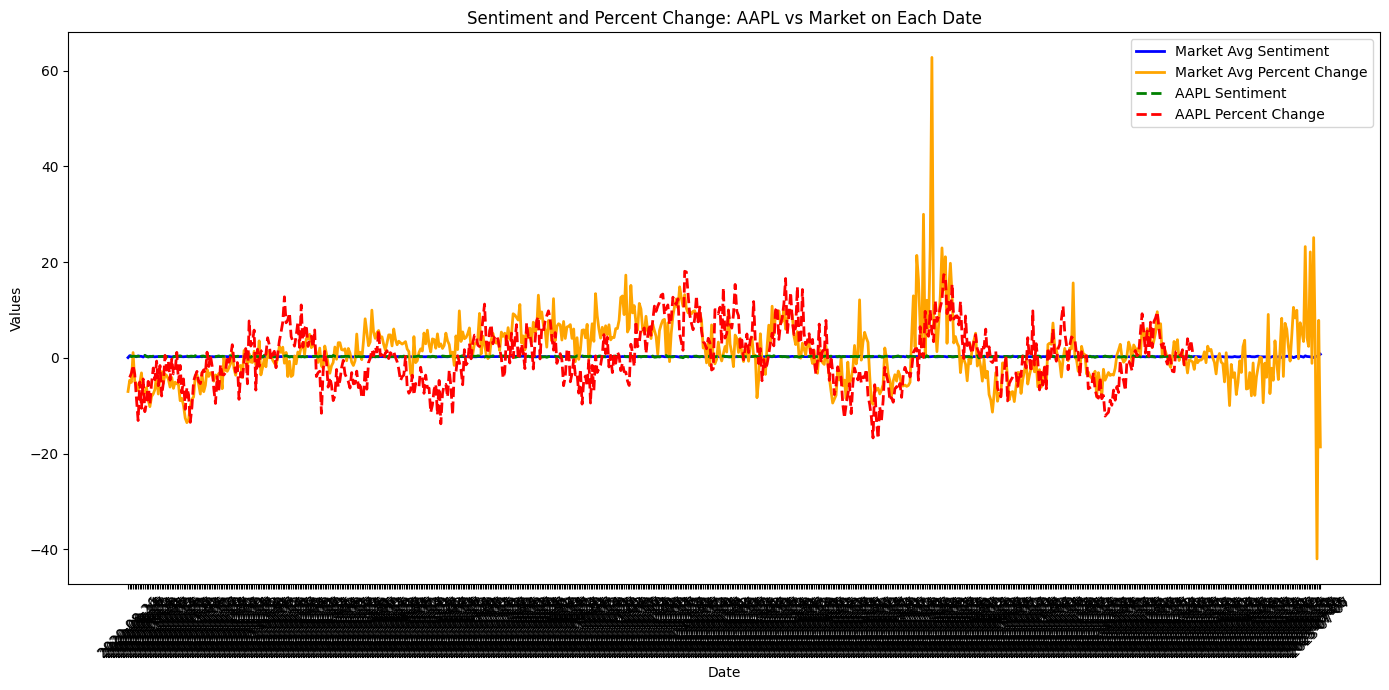

In [ ]:
plt.figure(figsize=(14, 7))

# Plot overall market averages
sns.lineplot(data=df_grouped, x='date', y='avg_sentiment', label='Market Avg Sentiment', color='blue', linewidth=2)
sns.lineplot(data=df_grouped, x='date', y='avg_pct_change', label='Market Avg Percent Change', color='orange', linewidth=2)

# Plot the specific company's trend
sns.lineplot(data=company_data, x='date', y='sentiment_sum', label=f'{company_name} Sentiment', color='green', linestyle='--', linewidth=2)
sns.lineplot(data=company_data, x='date', y='pct_change', label=f'{company_name} Percent Change', color='red', linestyle='--', linewidth=2)

plt.title(f'Sentiment and Percent Change: {company_name} vs Market on Each Date')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


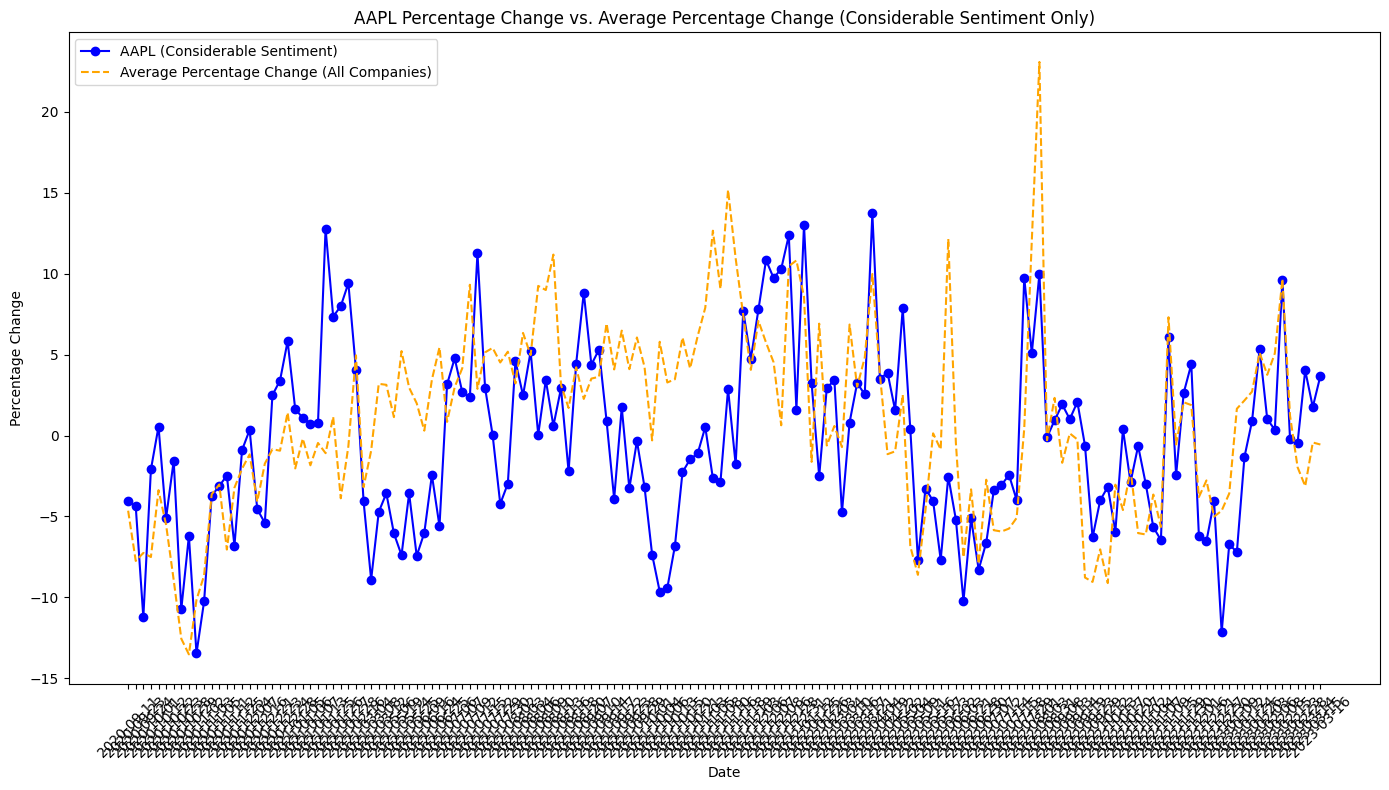

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'tech' is your dataset, with columns 'Date', 'Company', 'sentiment_sum', and 'pct_change'
# Specify the stock you want to analyze
target_stock = "AAPL"  # Replace "Stock_Name" with the name of the stock in your dataset

# Define thresholds for considerable positive and negative sentiment for the target stock
positive_sentiment_threshold = tech['sentiment_sum'].quantile(0.75)  # Top 25% as considerable positive sentiment
negative_sentiment_threshold = tech['sentiment_sum'].quantile(0.25)  # Bottom 25% as considerable negative sentiment

# Filter data for the target stock with considerable sentiment
target_stock_df = tech[(tech['ticker'] == target_stock) &
                       ((tech['sentiment_sum'] >= positive_sentiment_threshold) |
                        (tech['sentiment_sum'] <= negative_sentiment_threshold))]

# Calculate the daily average pct_change across all companies
avg_pct_change = tech.groupby('date')['pct_change'].mean().reset_index()

# Merge the target stock data and the avg_pct_change data on Date for aligned plotting
merged_df = pd.merge(target_stock_df[['date', 'pct_change']], avg_pct_change, on='date', suffixes=('_target', '_avg'))

# Plot the target stock's pct_change and the average pct_change on the same plot
plt.figure(figsize=(14, 8))

# Plot target stock's pct_change (considerable sentiment only)
plt.plot(merged_df['date'], merged_df['pct_change_target'], label=f'{target_stock} (Considerable Sentiment)', color='blue', marker='o')

# Plot average pct_change of all companies
plt.plot(merged_df['date'], merged_df['pct_change_avg'], label='Average Percentage Change (All Companies)', color='orange', linestyle='--')

# Titles and labels
plt.title(f'{target_stock} Percentage Change vs. Average Percentage Change (Considerable Sentiment Only)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



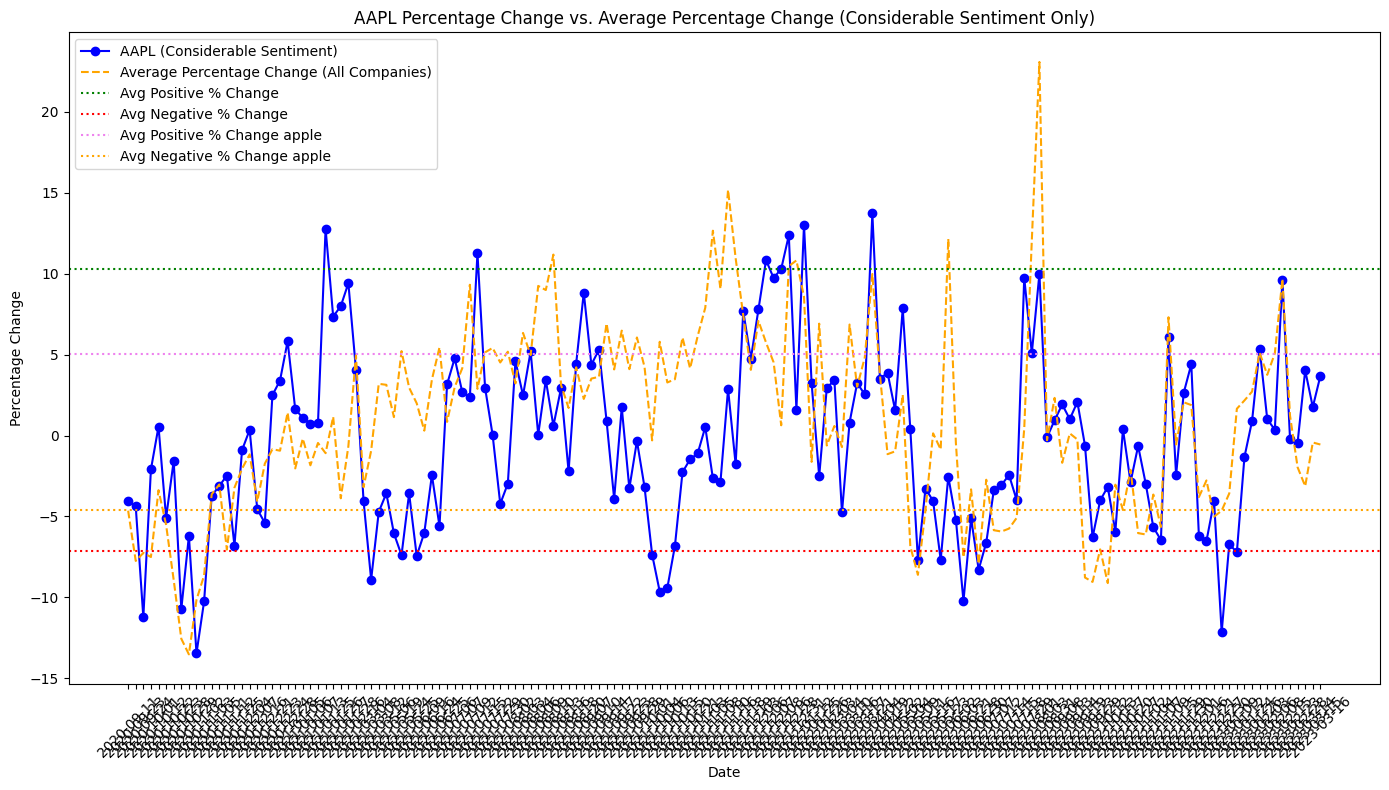

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'tech' is your dataset, with columns 'Date', 'Company', 'sentiment_sum', and 'pct_change'
# Specify the stock you want to analyze
target_stock = "AAPL"  # Replace "Stock_Name" with the name of the stock in your dataset

# Define thresholds for considerable positive and negative sentiment for the target stock
positive_sentiment_threshold = tech['sentiment_sum'].quantile(0.75)  # Top 25% as considerable positive sentiment
negative_sentiment_threshold = tech['sentiment_sum'].quantile(0.25)  # Bottom 25% as considerable negative sentiment

# Filter data for the target stock with considerable sentiment
target_stock_df = tech[(tech['ticker'] == target_stock) &
                       ((tech['sentiment_sum'] >= positive_sentiment_threshold) |
                        (tech['sentiment_sum'] <= negative_sentiment_threshold))]

# Calculate the daily average pct_change across all companies
avg_pct_change = tech.groupby('date')['pct_change'].mean().reset_index()

# Calculate the average positive and negative pct_change for all companies
positive_avg_pct_change = tech[tech['pct_change'] > 0]['pct_change'].mean()
negative_avg_pct_change = tech[tech['pct_change'] < 0]['pct_change'].mean()
u=tech[(tech['ticker'] == target_stock)]
positive_avg_pct_change_com = u[u['pct_change'] > 0]['pct_change'].mean()
negative_avg_pct_change_com = u[u['pct_change'] < 0]['pct_change'].mean()
# Merge the target stock data and the avg_pct_change data on Date for aligned plotting
merged_df = pd.merge(target_stock_df[['date', 'pct_change']], avg_pct_change, on='date', suffixes=('_target', '_avg'))

# Plot the target stock's pct_change and the average pct_change on the same plot
plt.figure(figsize=(14, 8))

# Plot target stock's pct_change (considerable sentiment only)
plt.plot(merged_df['date'], merged_df['pct_change_target'], label=f'{target_stock} (Considerable Sentiment)', color='blue', marker='o')

# Plot average pct_change of all companies
plt.plot(merged_df['date'], merged_df['pct_change_avg'], label='Average Percentage Change (All Companies)', color='orange', linestyle='--')

# Add baseline for positive and negative averages
plt.axhline(y=positive_avg_pct_change, color='green', linestyle=':', label='Avg Positive % Change')
plt.axhline(y=negative_avg_pct_change, color='red', linestyle=':', label='Avg Negative % Change')
plt.axhline(y=positive_avg_pct_change_com, color='violet', linestyle=':', label='Avg Positive % Change apple')
plt.axhline(y=negative_avg_pct_change_com, color='orange', linestyle=':', label='Avg Negative % Change apple')
# Titles and labels
plt.title(f'{target_stock} Percentage Change vs. Average Percentage Change (Considerable Sentiment Only)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Define thresholds for the company-specific positive and negative average pct_change
lower_threshold = negative_avg_pct_change_com
upper_threshold = positive_avg_pct_change_com

# Count points where the target stock's pct_change falls within this range
within_threshold_count = target_stock_df[(target_stock_df['pct_change'] >= lower_threshold) &
                                         (target_stock_df['pct_change'] <= upper_threshold)].shape[0]

# Calculate the percentage of points within this range
total_count = target_stock_df.shape[0]
percentage_within_threshold = (within_threshold_count / total_count) * 100

# Output the result
print(f"Percentage of points where {target_stock}'s pct_change falls within its threshold range: {percentage_within_threshold:.2f}%")


Percentage of points where AAPL's pct_change falls within its threshold range: 62.03%


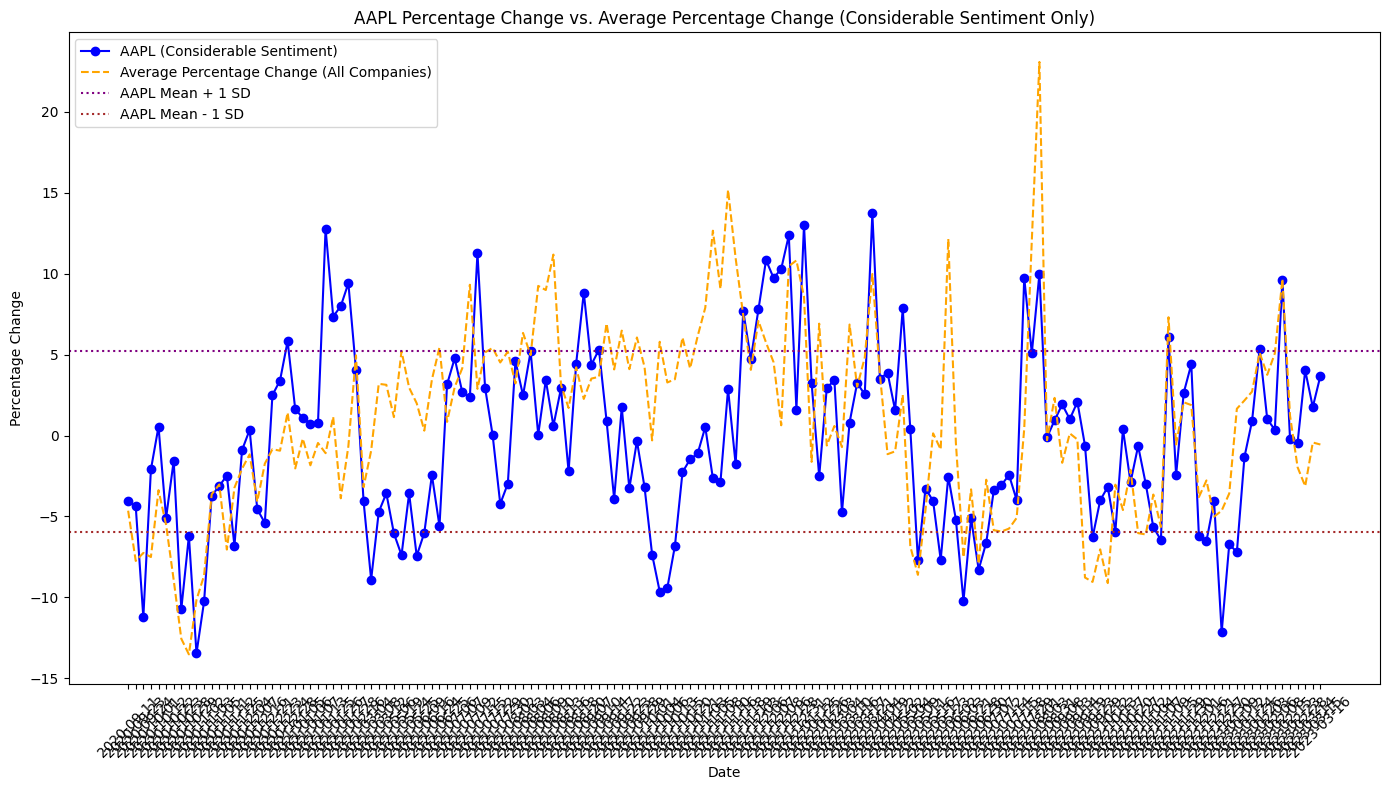

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'tech' is your dataset, with columns 'Date', 'ticker', 'sentiment_sum', and 'pct_change'
# Specify the stock you want to analyze
target_stock = "AAPL"  # Replace with the ticker symbol of the stock in your dataset

# Define thresholds for considerable positive and negative sentiment for the target stock
positive_sentiment_threshold = tech['sentiment_sum'].quantile(0.75)  # Top 25% as considerable positive sentiment
negative_sentiment_threshold = tech['sentiment_sum'].quantile(0.25)  # Bottom 25% as considerable negative sentiment

# Filter data for the target stock with considerable sentiment
target_stock_df = tech[(tech['ticker'] == target_stock) &
                       ((tech['sentiment_sum'] >= positive_sentiment_threshold) |
                        (tech['sentiment_sum'] <= negative_sentiment_threshold))]

# Calculate the daily average pct_change across all companies
avg_pct_change = tech.groupby('date')['pct_change'].mean().reset_index()

# Calculate mean and standard deviation of pct_change for the target stock
u = tech[tech['ticker'] == target_stock]
mean_pct_change_com = target_stock_df['pct_change'].mean()
std_dev_pct_change_com = target_stock_df['pct_change'].std()

# Calculate new thresholds as mean ± one standard deviation
upper_threshold = mean_pct_change_com + std_dev_pct_change_com
lower_threshold = mean_pct_change_com - std_dev_pct_change_com

# Merge the target stock data and the avg_pct_change data on Date for aligned plotting
merged_df = pd.merge(target_stock_df[['date', 'pct_change']], avg_pct_change, on='date', suffixes=('_target', '_avg'))

# Plot the target stock's pct_change and the average pct_change on the same plot
plt.figure(figsize=(14, 8))

# Plot target stock's pct_change (considerable sentiment only)
plt.plot(merged_df['date'], merged_df['pct_change_target'], label=f'{target_stock} (Considerable Sentiment)', color='blue', marker='o')

# Plot average pct_change of all companies
plt.plot(merged_df['date'], merged_df['pct_change_avg'], label='Average Percentage Change (All Companies)', color='orange', linestyle='--')

# Add baseline for thresholds
plt.axhline(y=upper_threshold, color='purple', linestyle=':', label=f'{target_stock} Mean + 1 SD')
plt.axhline(y=lower_threshold, color='brown', linestyle=':', label=f'{target_stock} Mean - 1 SD')

# Titles and labels
plt.title(f'{target_stock} Percentage Change vs. Average Percentage Change (Considerable Sentiment Only)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:


# Count points where the target stock's pct_change falls within this range
within_threshold_count = target_stock_df[(target_stock_df['pct_change'] >= lower_threshold) &
                                         (target_stock_df['pct_change'] <= upper_threshold)].shape[0]

# Calculate the percentage of points within this range
total_count = target_stock_df.shape[0]
percentage_within_threshold = (within_threshold_count / total_count) * 100

# Output the result
print(f"Percentage of points where {target_stock}'s pct_change falls within its threshold range: {percentage_within_threshold:.2f}%")

Percentage of points where AAPL's pct_change falls within its threshold range: 68.99%


Percentage of points outside the 90th percentile threshold: 16.46%
Percentage of points outside the 95th percentile threshold: 8.86%


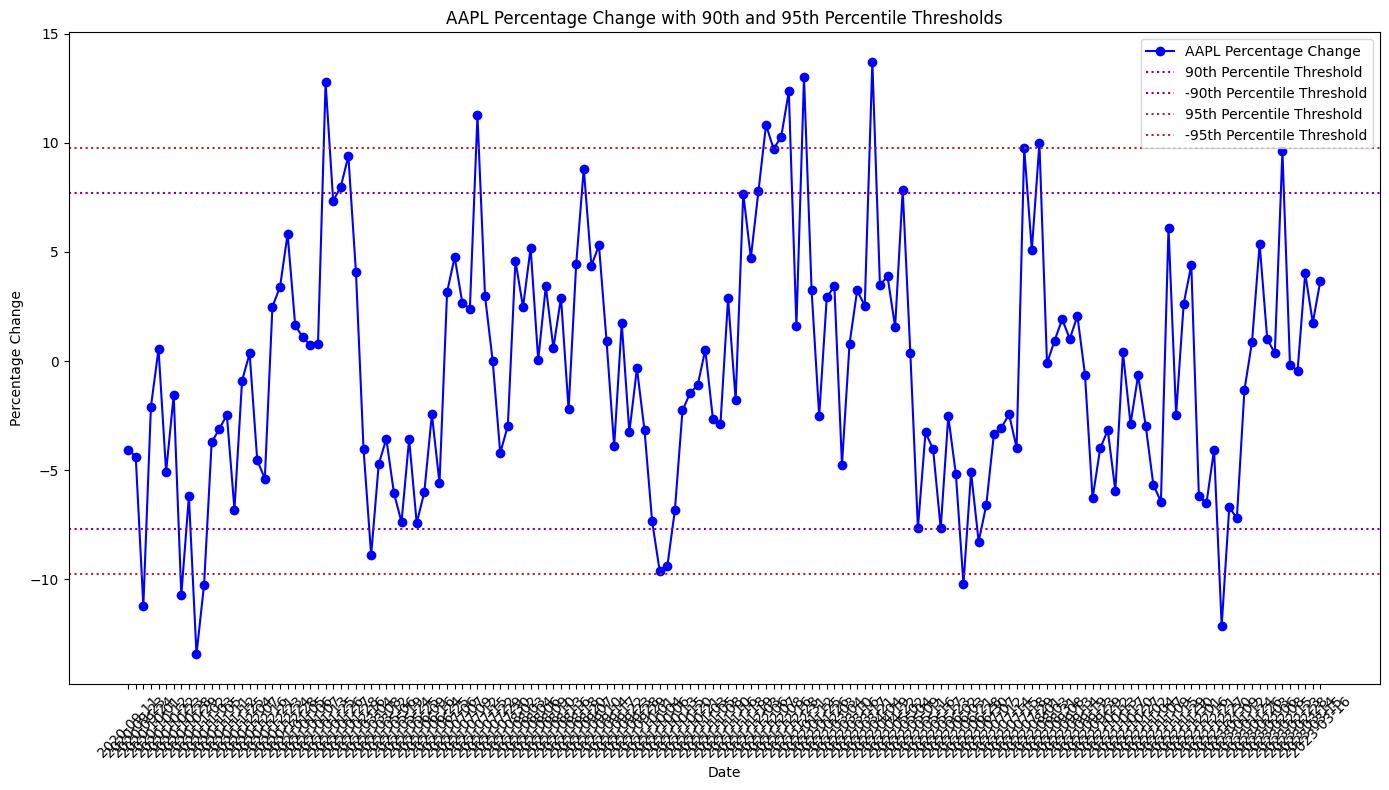

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'tech' is your dataset, with columns 'Date', 'ticker', 'sentiment_sum', and 'pct_change'
# Specify the stock you want to analyze
target_stock = "AAPL"  # Replace with the ticker symbol of the stock in your dataset

# Define thresholds for considerable positive and negative sentiment for the target stock
positive_sentiment_threshold = tech['sentiment_sum'].quantile(0.75)  # Top 25% as considerable positive sentiment
negative_sentiment_threshold = tech['sentiment_sum'].quantile(0.25)  # Bottom 25% as considerable negative sentiment

# Filter data for the target stock with considerable sentiment
target_stock_df = tech[(tech['ticker'] == target_stock) &
                       ((tech['sentiment_sum'] >= positive_sentiment_threshold) |
                        (tech['sentiment_sum'] <= negative_sentiment_threshold))]

# Calculate the daily average pct_change across all companies
avg_pct_change = tech.groupby('date')['pct_change'].mean().reset_index()

# Calculate mean and standard deviation of pct_change for the target stock
pct_change_90th = target_stock_df['pct_change'].quantile(0.90)
pct_change_95th = target_stock_df['pct_change'].quantile(0.95)

# Count how many points fall outside the 90th and 95th percentiles
u=target_stock_df.copy()
outside_90th = target_stock_df[(u['pct_change'] > pct_change_90th) | (u['pct_change'] < -pct_change_90th)]
outside_95th = u[(u['pct_change'] > pct_change_95th) | (u['pct_change'] < -pct_change_95th)]

# Calculate total points for the target stock
total_points = u.shape[0]

# Calculate percentages
percentage_outside_90th = (outside_90th.shape[0] / total_points) * 100
percentage_outside_95th = (outside_95th.shape[0] / total_points) * 100

# Print results
print(f"Percentage of points outside the 90th percentile threshold: {percentage_outside_90th:.2f}%")
print(f"Percentage of points outside the 95th percentile threshold: {percentage_outside_95th:.2f}%")

# Optional: Plotting the pct_change with thresholds
plt.figure(figsize=(14, 8))

# Plot target stock's pct_change
plt.plot(u['date'], u['pct_change'], label=f'{target_stock} Percentage Change', color='blue', marker='o')

# Add baseline for thresholds
plt.axhline(y=pct_change_90th, color='purple', linestyle=':', label='90th Percentile Threshold')
plt.axhline(y=-pct_change_90th, color='purple', linestyle=':', label='-90th Percentile Threshold')
plt.axhline(y=pct_change_95th, color='brown', linestyle=':', label='95th Percentile Threshold')
plt.axhline(y=-pct_change_95th, color='brown', linestyle=':', label='-95th Percentile Threshold')

# Titles and labels
plt.title(f'{target_stock} Percentage Change with 90th and 95th Percentile Thresholds')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['Industry'].unique()

array(['Airlines', 'Technology', 'Industrial Goods', 'Healthcare',
       'Retail', 'Financial Services', 'Entertainment',
       'Aerospace & Defense', 'Professional Services', 'Real Estate',
       'Restaurant', 'Communication Services', 'Services', 'Energy',
       'Transportation', 'Hospitality', 'Automotive',
       'Telecommunications', 'Consumer Goods', 'Distribution'],
      dtype=object)

In [ ]:
u=df[df['Industry']=='Healthcare']

In [ ]:
u['ticker'].value_counts()

ticker
IQV      632
CVS      620
NVS      605
GSK      602
HCA      596
TMO      596
MDT      588
DVA      584
ABT      580
ELV      564
ICLR     557
CNC      557
AZN      556
PFE      549
SYK      546
DGX      536
HUM      535
ALIZY    519
RADCQ    496
SAGE     488
BSX      484
CAH      473
MCK      466
MRK      457
BMY      453
BKD      449
BAX      436
GEHC      53
Name: count, dtype: int64

In [ ]:
tech=u.copy()

Percentage of points outside the 90th percentile threshold: 14.29%
Percentage of points outside the 95th percentile threshold: 7.62%


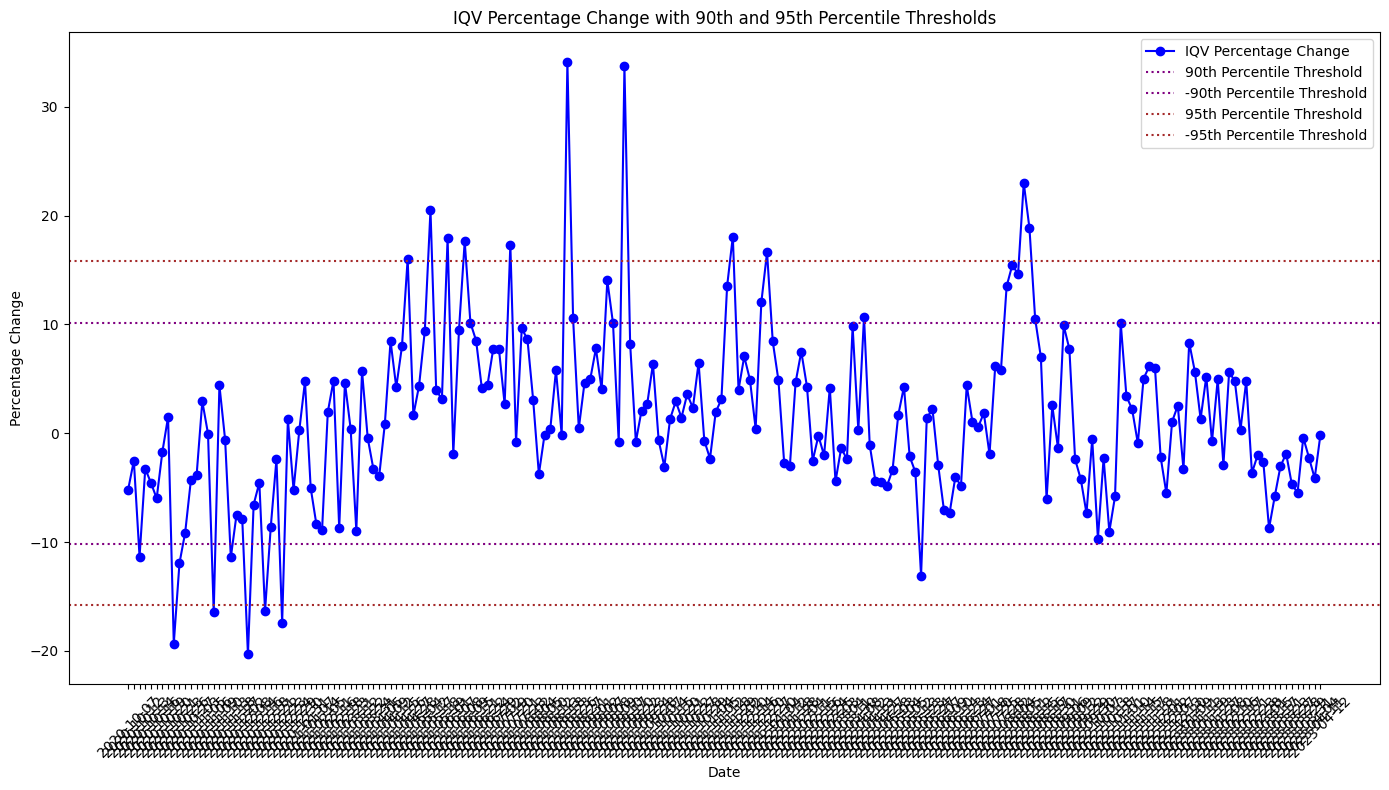

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'tech' is your dataset, with columns 'Date', 'ticker', 'sentiment_sum', and 'pct_change'
# Specify the stock you want to analyze
target_stock = "IQV"  # Replace with the ticker symbol of the stock in your dataset

# Define thresholds for considerable positive and negative sentiment for the target stock
positive_sentiment_threshold = tech['sentiment_sum'].quantile(0.75)  # Top 25% as considerable positive sentiment
negative_sentiment_threshold = tech['sentiment_sum'].quantile(0.25)  # Bottom 25% as considerable negative sentiment

# Filter data for the target stock with considerable sentiment
target_stock_df = tech[(tech['ticker'] == target_stock) &
                       ((tech['sentiment_sum'] >= positive_sentiment_threshold) |
                        (tech['sentiment_sum'] <= negative_sentiment_threshold))]

# Calculate the daily average pct_change across all companies
avg_pct_change = tech.groupby('date')['pct_change'].mean().reset_index()

# Calculate mean and standard deviation of pct_change for the target stock
pct_change_90th = target_stock_df['pct_change'].quantile(0.90)
pct_change_95th = target_stock_df['pct_change'].quantile(0.95)

# Count how many points fall outside the 90th and 95th percentiles
u=target_stock_df.copy()
outside_90th = target_stock_df[(u['pct_change'] > pct_change_90th) | (u['pct_change'] < -pct_change_90th)]
outside_95th = u[(u['pct_change'] > pct_change_95th) | (u['pct_change'] < -pct_change_95th)]

# Calculate total points for the target stock
total_points = u.shape[0]

# Calculate percentages
percentage_outside_90th = (outside_90th.shape[0] / total_points) * 100
percentage_outside_95th = (outside_95th.shape[0] / total_points) * 100

# Print results
print(f"Percentage of points outside the 90th percentile threshold: {percentage_outside_90th:.2f}%")
print(f"Percentage of points outside the 95th percentile threshold: {percentage_outside_95th:.2f}%")

# Optional: Plotting the pct_change with thresholds
plt.figure(figsize=(14, 8))

# Plot target stock's pct_change
plt.plot(u['date'], u['pct_change'], label=f'{target_stock} Percentage Change', color='blue', marker='o')

# Add baseline for thresholds
plt.axhline(y=pct_change_90th, color='purple', linestyle=':', label='90th Percentile Threshold')
plt.axhline(y=-pct_change_90th, color='purple', linestyle=':', label='-90th Percentile Threshold')
plt.axhline(y=pct_change_95th, color='brown', linestyle=':', label='95th Percentile Threshold')
plt.axhline(y=-pct_change_95th, color='brown', linestyle=':', label='-95th Percentile Threshold')

# Titles and labels
plt.title(f'{target_stock} Percentage Change with 90th and 95th Percentile Thresholds')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df=pd.merge(df,industry,on='ticker')

In [ ]:
industry=pd.read_csv('industry_df.csv')

In [ ]:
df=pd.read_csv('y.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'ticker', 'date', 'rating', 'year', 'sentiment_sum',
       'pct_change', 'Volume', 'oil_prices', 'stock_market', 'pe_ratio',
       'Industry', 'lag_pct_change', 'pros_sentiment', 'cons_sentiment',
       'sentiment_sum_1', 'sentiment_sum_2', 'log_volume', 'Country',
       'ExchangeRate'],
      dtype='object')

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assume 'df' is your dataset with columns 'date', 'ticker', 'sentiment_sum', 'pct_change', and 'Industry'
# Extract the year from the 'date' column
df['Year'] = pd.to_datetime(df['date']).dt.year

# Define thresholds for considerable positive and negative sentiment
positive_sentiment_threshold = df['sentiment_sum'].quantile(0.75)  # Top 25%
negative_sentiment_threshold = df['sentiment_sum'].quantile(0.25)  # Bottom 25%

# Filter data with considerable sentiment
filtered_df = df[
    (df['sentiment_sum'] >= positive_sentiment_threshold) |
    (df['sentiment_sum'] <= negative_sentiment_threshold)
]

# Perform the analysis year by year
for year, yearly_data in filtered_df.groupby('Year'):
    print(f"\nYear: {year}")

    # Calculate thresholds using mean ± 3 × standard deviation
    mean_pct_change = yearly_data['pct_change'].mean()
    std_pct_change = yearly_data['pct_change'].std()
    upper_threshold = mean_pct_change + 3 * std_pct_change
    lower_threshold = mean_pct_change - 3 * std_pct_change

    # Identify points outside the thresholds
    outside_3sigma = yearly_data[
        (yearly_data['pct_change'] > upper_threshold) |
        (yearly_data['pct_change'] < lower_threshold)
    ]

    # Identify points inside the thresholds
    inside_3sigma = yearly_data[
        (yearly_data['pct_change'] <= upper_threshold) &
        (yearly_data['pct_change'] >= lower_threshold)
    ]

    # Calculate total points for the year
    total_points = yearly_data.shape[0]

    # Calculate percentage of points outside the thresholds
    percentage_outside_3sigma = (outside_3sigma.shape[0] / total_points) * 100

    # Print results
    print(f"Percentage of points outside the ±3σ thresholds: {percentage_outside_3sigma:.2f}%")

    # Separate points based on Industry for plotting
    red_star_points = outside_3sigma[outside_3sigma['Industry'].isin(['Technology', 'Financial Services', 'Retail','Healthcare'])]
    green_star_points = outside_3sigma[~outside_3sigma['Industry'].isin(['Technology', 'Financial Services', 'Retail','Healthcare'])]

    # Plotting with Plotly
    fig = go.Figure()

    # Add red stars (Tech/Finance/Retail points outside thresholds)
    fig.add_trace(go.Scatter(
        x=red_star_points['date'],
        y=red_star_points['pct_change'],
        mode='markers',
        marker=dict(color='red', symbol='star', size=10),
        name='Tech/Finance/Retail (Outside Threshold)'
    ))

    # Add green stars (Other industries outside thresholds)
    fig.add_trace(go.Scatter(
        x=green_star_points['date'],
        y=green_star_points['pct_change'],
        mode='markers',
        marker=dict(color='green', symbol='star', size=10),
        name='Other Industries (Outside Threshold)'
    ))

    # Add blue points (Inside thresholds)
    fig.add_trace(go.Scatter(
        x=inside_3sigma['date'],
        y=inside_3sigma['pct_change'],
        mode='markers',
        marker=dict(color='blue', size=8),
        name='Inside Threshold'
    ))

    # Add horizontal lines for the thresholds
    fig.add_hline(
        y=upper_threshold,
        line_dash='dash',
        line_color='black',
        annotation_text='Mean + 3σ',
        annotation_position='top left'
    )
    fig.add_hline(
        y=lower_threshold,
        line_dash='dash',
        line_color='black',
        annotation_text='Mean - 3σ',
        annotation_position='bottom left'
    )

    # Update layout with titles and axis labels
    fig.update_layout(
        title=f'Year {year}: Percentage Change with ±3σ Thresholds',
        xaxis_title='Date',
        yaxis_title='Percentage Change',
        legend_title='Legend',
        template='plotly_white'
    )

    # Show the figure
    fig.show()




Year: 2020
Percentage of points outside the ±3σ thresholds: 1.59%



Year: 2021
Percentage of points outside the ±3σ thresholds: 0.23%



Year: 2022
Percentage of points outside the ±3σ thresholds: 0.08%



Year: 2023
Percentage of points outside the ±3σ thresholds: 2.09%


In [ ]:
df['Industry'].unique()

array(['Airlines', 'Technology', 'Industrial Goods', 'Healthcare',
       'Retail', 'Financial Services', 'Entertainment',
       'Aerospace & Defense', 'Professional Services', 'Real Estate',
       'Restaurant', 'Communication Services', 'Services', 'Energy',
       'Transportation', 'Hospitality', 'Automotive',
       'Telecommunications', 'Consumer Goods', 'Distribution'],
      dtype=object)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assume 'df' is your dataset with columns 'date', 'ticker', 'sentiment_sum', 'pct_change', and 'Industry'
# Extract the year from the 'date' column
df['Year'] = pd.to_datetime(df['date']).dt.year

# Define thresholds for considerable positive and negative sentiment
positive_sentiment_threshold = df['sentiment_sum'].quantile(0.75)  # Top 25%
negative_sentiment_threshold = df['sentiment_sum'].quantile(0.25)  # Bottom 25%

# Filter data with considerable sentiment
filtered_df = df[
    (df['sentiment_sum'] >= positive_sentiment_threshold) |
    (df['sentiment_sum'] <= negative_sentiment_threshold)
]

# Initialize a list to store summary information for each year
summary_data = []

# Perform the analysis year by year
for year, yearly_data in filtered_df.groupby('Year'):
    print(f"\nYear: {year}")

    # Calculate thresholds using mean ± 3 × standard deviation
    mean_pct_change = yearly_data['pct_change'].mean()
    std_pct_change = yearly_data['pct_change'].std()
    upper_threshold = mean_pct_change + 3 * std_pct_change
    lower_threshold = mean_pct_change - 3 * std_pct_change

    # Identify points outside the thresholds
    outside_3sigma = yearly_data[
        (yearly_data['pct_change'] > upper_threshold) |
        (yearly_data['pct_change'] < lower_threshold)
    ]

    # Identify points inside the thresholds
    inside_3sigma = yearly_data[
        (yearly_data['pct_change'] <= upper_threshold) &
        (yearly_data['pct_change'] >= lower_threshold)
    ]

    # Calculate total points for the year
    total_points = yearly_data.shape[0]

    # Calculate percentage of points outside the thresholds
    percentage_outside_3sigma = (outside_3sigma.shape[0] / total_points) * 100

    # Print results
    print(f"Percentage of points outside the ±3σ thresholds: {percentage_outside_3sigma:.2f}%")

    # Separate points based on Industry for plotting
    clustered_industries = ['Technology', 'Financial Services', 'Retail', 'Healthcare']
    red_star_points = outside_3sigma[outside_3sigma['Industry'].isin(clustered_industries)]
    green_star_points = outside_3sigma[~outside_3sigma['Industry'].isin(clustered_industries)]

    # Add summary data for this year
    summary_data.append({
        'Year': year,
        'Clustered Industries (Outside Threshold)': red_star_points.shape[0],
        'Non-Clustered Industries (Outside Threshold)': green_star_points.shape[0]
    })

    # Plotting with Plotly
    fig = go.Figure()

    # Add red stars (Clustered industries outside thresholds)
    fig.add_trace(go.Scatter(
        x=red_star_points['date'],
        y=red_star_points['pct_change'],
        mode='markers',
        marker=dict(color='red', symbol='star', size=10),
        name='Clustered Industries (Outside Threshold)'
    ))

    # Add green stars (Non-clustered industries outside thresholds)
    fig.add_trace(go.Scatter(
        x=green_star_points['date'],
        y=green_star_points['pct_change'],
        mode='markers',
        marker=dict(color='green', symbol='star', size=10),
        name='Non-Clustered Industries (Outside Threshold)'
    ))

    # Add blue points (Inside thresholds)
    fig.add_trace(go.Scatter(
        x=inside_3sigma['date'],
        y=inside_3sigma['pct_change'],
        mode='markers',
        marker=dict(color='blue', size=8),
        name='Inside Threshold'
    ))

    # Add horizontal lines for the thresholds
    fig.add_hline(
        y=upper_threshold,
        line_dash='dash',
        line_color='black',
        annotation_text='Mean + 3σ',
        annotation_position='top left'
    )
    fig.add_hline(
        y=lower_threshold,
        line_dash='dash',
        line_color='black',
        annotation_text='Mean - 3σ',
        annotation_position='bottom left'
    )

    # Update layout with titles and axis labels
    fig.update_layout(
        title=f'Year {year}: Percentage Change with ±3σ Thresholds',
        xaxis_title='Date',
        yaxis_title='Percentage Change',
        legend_title='Legend',
        template='plotly_white'
    )

    # Show the figure
    fig.show()

# Create a DataFrame from the summary data
summary_df = pd.DataFrame(summary_data)





Year: 2020
Percentage of points outside the ±3σ thresholds: 1.59%



Year: 2021
Percentage of points outside the ±3σ thresholds: 0.23%



Year: 2022
Percentage of points outside the ±3σ thresholds: 0.08%



Year: 2023
Percentage of points outside the ±3σ thresholds: 2.09%


In [ ]:
summary_df

Year  Clustered Industries (Outside Threshold)  \
0  2020                                        51   
1  2021                                        22   
2  2022                                        10   
3  2023                                        86   

   Non-Clustered Industries (Outside Threshold)  
0                                            30  
1                                            27  
2                                             8  
3                                            34

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/daily dataset.csv')


Year: 2020
Percentage of points outside the ±3σ thresholds: 1.59%


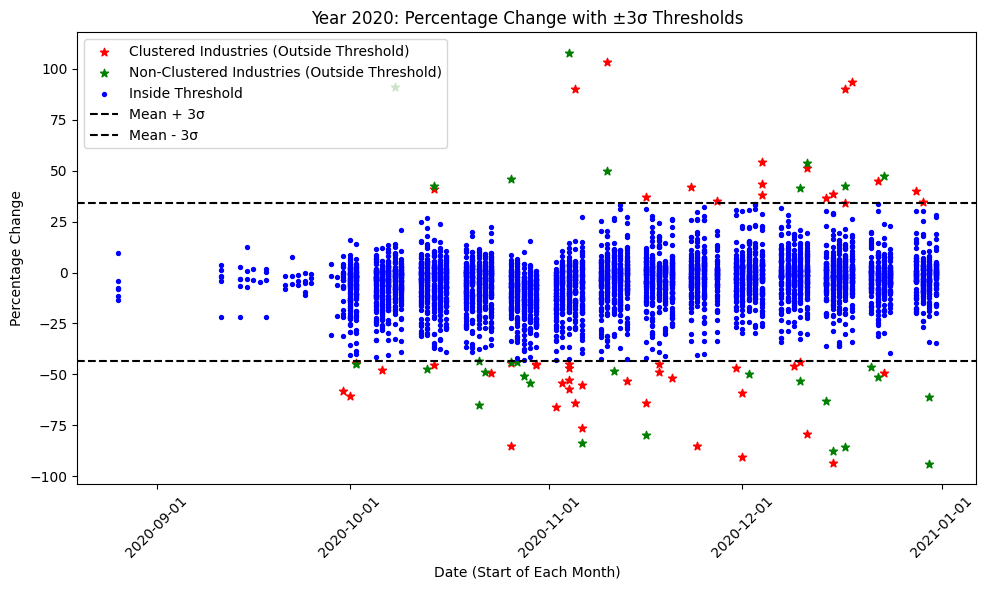


Year: 2021
Percentage of points outside the ±3σ thresholds: 0.23%


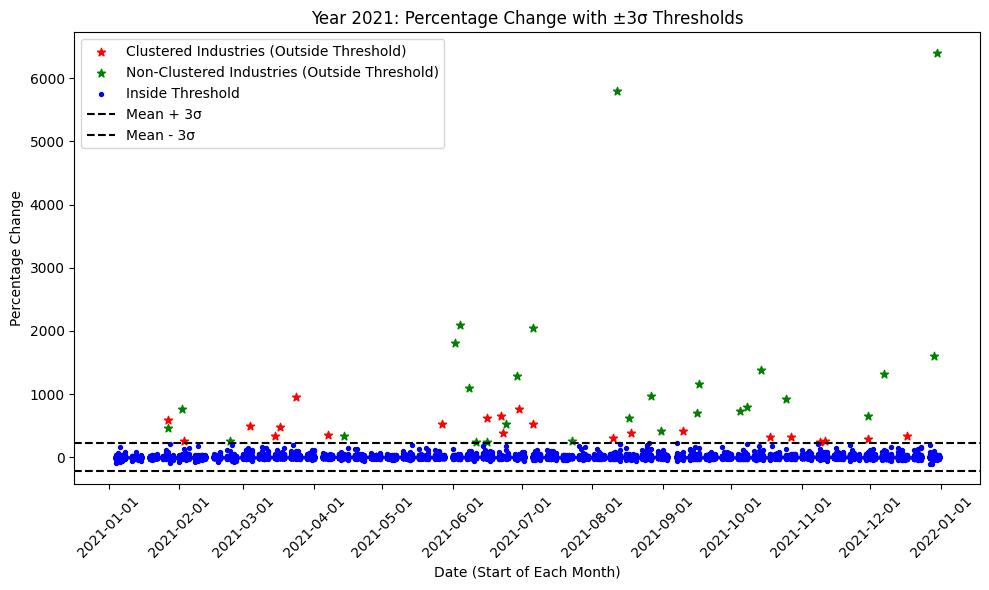


Year: 2022
Percentage of points outside the ±3σ thresholds: 0.08%


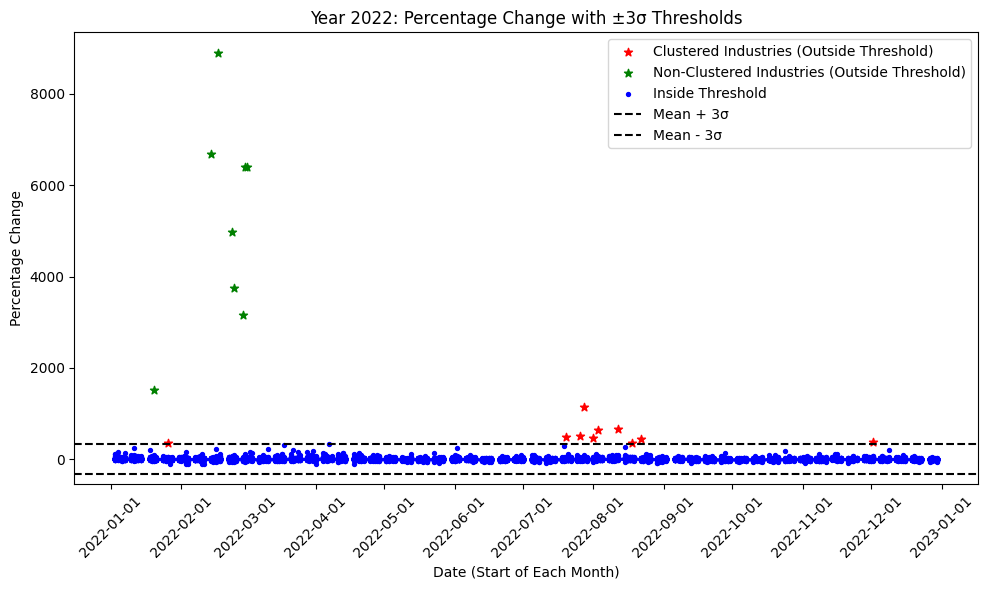


Year: 2023
Percentage of points outside the ±3σ thresholds: 2.09%


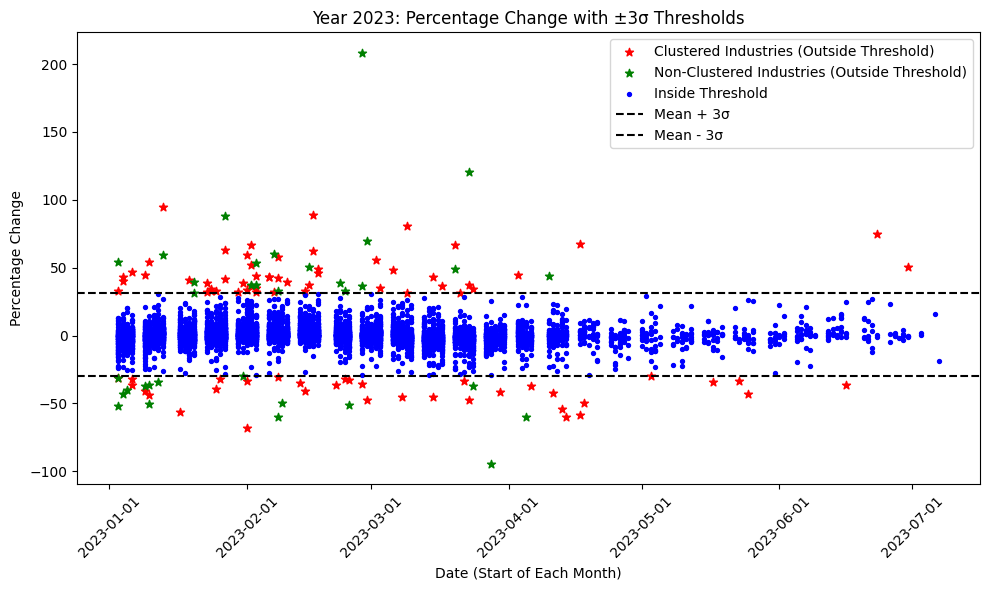

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Extract year from 'date' column
df['Year'] = pd.to_datetime(df['date']).dt.year

# Define thresholds for considerable positive and negative sentiment
positive_sentiment_threshold = df['sentiment_sum'].quantile(0.75)  # Top 25%
negative_sentiment_threshold = df['sentiment_sum'].quantile(0.25)  # Bottom 25%

# Filter data with considerable sentiment
filtered_df = df[
    (df['sentiment_sum'] >= positive_sentiment_threshold) |
    (df['sentiment_sum'] <= negative_sentiment_threshold)
]

# Initialize a list to store summary information for each year
summary_data = []

# Perform the analysis year by year
for year, yearly_data in filtered_df.groupby('Year'):
    print(f"\nYear: {year}")

    # Calculate thresholds using mean ± 3 × standard deviation
    mean_pct_change = yearly_data['pct_change'].mean()
    std_pct_change = yearly_data['pct_change'].std()
    upper_threshold = mean_pct_change + 3 * std_pct_change
    lower_threshold = mean_pct_change - 3 * std_pct_change

    # Identify points outside the thresholds
    outside_3sigma = yearly_data[
        (yearly_data['pct_change'] > upper_threshold) |
        (yearly_data['pct_change'] < lower_threshold)
    ]

    # Identify points inside the thresholds
    inside_3sigma = yearly_data[
        (yearly_data['pct_change'] <= upper_threshold) &
        (yearly_data['pct_change'] >= lower_threshold)
    ]

    # Calculate total points for the year
    total_points = yearly_data.shape[0]

    # Calculate percentage of points outside the thresholds
    percentage_outside_3sigma = (outside_3sigma.shape[0] / total_points) * 100

    # Print results
    print(f"Percentage of points outside the ±3σ thresholds: {percentage_outside_3sigma:.2f}%")

    # Separate points based on Industry for plotting
    clustered_industries = ['Technology', 'Financial Services', 'Retail', 'Healthcare']
    red_star_points = outside_3sigma[outside_3sigma['Industry'].isin(clustered_industries)]
    green_star_points = outside_3sigma[~outside_3sigma['Industry'].isin(clustered_industries)]

    # Add summary data for this year
    summary_data.append({
        'Year': year,
        'Clustered Industries (Outside Threshold)': red_star_points.shape[0],
        'Non-Clustered Industries (Outside Threshold)': green_star_points.shape[0]
    })

    # Plotting with Matplotlib
    fig, ax = plt.subplots(figsize=(10, 6))

    # Red stars (Clustered industries outside thresholds)
    ax.scatter(
        pd.to_datetime(red_star_points['date']),
        red_star_points['pct_change'],
        color='red', marker='*', label='Clustered Industries (Outside Threshold)'
    )

    # Green stars (Non-clustered industries outside thresholds)
    ax.scatter(
        pd.to_datetime(green_star_points['date']),
        green_star_points['pct_change'],
        color='green', marker='*', label='Non-Clustered Industries (Outside Threshold)'
    )

    # Blue points (Inside thresholds)
    ax.scatter(
        pd.to_datetime(inside_3sigma['date']),
        inside_3sigma['pct_change'],
        color='blue', s=8, label='Inside Threshold'
    )

    # Horizontal lines for thresholds
    ax.axhline(y=upper_threshold, color='black', linestyle='--', label='Mean + 3σ')
    ax.axhline(y=lower_threshold, color='black', linestyle='--', label='Mean - 3σ')

    # Format date on x-axis to show the start of each month
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Ticks at the start of each month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-01'))  # Format as 'YYYY-MM-DD'
    plt.xticks(rotation=45)

    # Titles and labels
    ax.set_title(f'Year {year}: Percentage Change with ±3σ Thresholds')
    ax.set_xlabel('Date (Start of Each Month)')
    ax.set_ylabel('Percentage Change')
    ax.legend()

    # Show the figure
    plt.tight_layout()
    plt.show()

# Create a DataFrame from the summary data
summary_df = pd.DataFrame(summary_data)



In [ ]:
df=pd.read_excel('/content/ols dataset.xlsx')

In [ ]:
df[df['rsquared']>0.85].shape

(6, 24)

In [ ]:
df=pd.read_csv('/content/ardl dataset.csv')

In [ ]:
df

Unnamed: 0 ticker  arima_r_squared  ardl_r_squared   arima_aic  \
0             0    AAL         0.791480        0.959777  166.225092   
1             1   AAPL         0.744614        0.903201  152.418277   
2             2  ABBNY         0.554784        0.847160  122.429466   
3             3    ABT         0.750051        0.840879  122.196164   
4             4    ACI         0.301957        0.436894  267.144286   
..          ...    ...              ...             ...         ...   
188         188    WMT         0.837736        0.915458  101.314972   
189         189    WNS         0.661979        0.824684  156.506756   
190         190   WOOF         0.503942        0.804157  204.545779   
191         191    XPO         0.710477        0.846256  185.488477   
192         192    XRX         0.552198        0.896773  183.820702   

       ardl_aic   arima_bic    ardl_bic  \
0    113.713363  178.530755  129.028062   
1    117.839153  165.029054  133.684539   
2     91.637879  136.102424  108.130632   
3    106.074913  134.806940  121.920299   
4    173.611376  278.353865  189.456762   
..          ...         ...         ...   
188   83.475445  114.220857   99.830700   
189  129.706368  169.698380  146.552247   
190  152.283565  221.864438  167.044990   
191  153.807539  197.794139  169.122239   
192  132.558523  196.126364  147.873222   

                                        combined_preds  \
0    3           NaN\n4           NaN\n5      6.393...   
1    1          NaN\n2          NaN\n3          NaN...   
2    1          NaN\n2          NaN\n3          NaN...   
3    1          NaN\n2          NaN\n3          NaN...   
4    1          NaN\n2          NaN\n3          NaN...   
..                                                 ...   
188  1          NaN\n2          NaN\n3          NaN...   
189  1          NaN\n2          NaN\n3          NaN...   
190  1           NaN\n2           NaN\n3           ...   
191  1           NaN\n2           NaN\n3           ...   
192  1          NaN\n2          NaN\n3          NaN...   

                                           arima_preds  \
0    3    -12.152697\n4     -1.616196\n5     -2.045...   
1    1    -1.395332\n2    -7.053660\n3     0.228871...   
2    1    -2.320578\n2    -2.331619\n3    -0.431811...   
3    1    -1.956617\n2    -1.977779\n3    -1.885132...   
4    1    -4.832944\n2    -3.720328\n3    -4.105204...   
..                                                 ...   
188  1    -1.266083\n2    -0.014048\n3     1.707275...   
189  1    -5.356677\n2    -1.192076\n3    -4.876327...   
190  1      9.882948\n2      4.810322\n3      2.763...   
191  1     -6.466221\n2     -2.550558\n3      3.401...   
192  1    -0.605352\n2    -1.175993\n3     3.171322...   

                                            ardl_preds  \
0    3           NaN\n4           NaN\n5     13.351...   
1    1          NaN\n2          NaN\n3          NaN...   
2    1          NaN\n2          NaN\n3          NaN...   
3    1          NaN\n2          NaN\n3          NaN...   
4    1          NaN\n2          NaN\n3          NaN...   
..                                                 ...   
188  1          NaN\n2          NaN\n3          NaN...   
189  1          NaN\n2          NaN\n3          NaN...   
190  1           NaN\n2           NaN\n3           ...   
191  1           NaN\n2           NaN\n3           ...   
192  1           NaN\n2           NaN\n3           ...   

                                         model_summary  \
0                                   SARIMAX Results...   
1                                   SARIMAX Results...   
2                                   SARIMAX Results...   
3                                   SARIMAX Results...   
4                                   SARIMAX Results...   
..                                                 ...   
188                                 SARIMAX Results...   
189                                 SARIMAX Results...   
190                   

In [ ]:
df[df['ardl_r_squared']>0.85].shape

(83, 13)